In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import imageio
from scipy import misc
from skimage import transform
from skimage import io
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
digits = pd.read_csv('train.csv')

In [575]:
digits

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
features = digits.iloc[:,1:]
labels = digits.iloc[:,0]

In [4]:
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.16,random_state=2)

# Classifiers

### RBF Kernel with gamma = 0.05 : 0.11 accuracy :'(

In [5]:
svm_clf1 = SVC(kernel='poly',degree=4,random_state=0)

In [6]:
svm_clf1.fit(features_train,labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

# Classifying using train_test_split

In [7]:
svm_predict1 = svm_clf1.predict(features_test)

In [8]:
svm_accuracy1 = accuracy_score(svm_predict1,labels_test)

In [9]:
svm_accuracy1

0.96741071428571423

# Random digit from dataset

In [587]:
labels.iloc[10296]

6

In [588]:
one_digit = features.iloc[10296]

In [589]:
one_digit=one_digit.values.reshape([1,784])

In [583]:
svm_clf1.predict(one_digit)

array([6])

In [584]:
one_digit.shape

(1, 784)

## Plot the random digit from the dataset

In [590]:
one_digit_plot = one_digit.reshape((28,28))

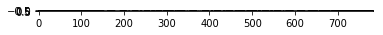

In [591]:
plt.imshow(one_digit, cmap='gray')
plt.show()

# Own image classification

In [570]:
img = imageio.imread('GUI/out_snapsave.jpg')
img = transform.resize(img, (28,28))
img = img.astype(features.dtypes)
img = misc.bytescale(img)
#thickness 30px paint3d 

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dante/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
  after removing the cwd from sys.path.


In [571]:
x_test = []
for eachRow in img:
    for eachPixel in eachRow:
        x_test.append(sum(eachPixel)/3)

In [572]:
x_test = np.array(x_test)
x_test.shape

(784,)

In [573]:
x_test = x_test.reshape([1,784])

In [574]:
svm_clf1.predict(x_test)

array([4])

### svm_poly: real{0(all),1d,3(2),3dd,4d,after 6d all}

## Plot the custom image

In [ ]:
x_test.dtype

In [576]:
x_test_plot = x_test.reshape((28,28))

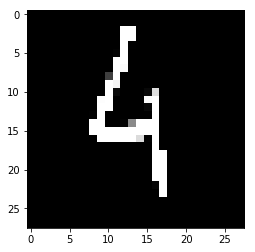

In [577]:
plt.imshow(x_test_plot, cmap='gray')
plt.show()

### svm_poly: 5dnew, 6(all),7(all),9(all)
###                    real{}

# CONFUSION MATRIX

In [ ]:
features.iloc[30].shape

In [ ]:
labels.unique()

In [ ]:
cm = confusion_matrix(x_test,one_digit)